In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My\ Drive/dataset/nordstrom/attributes

/content/drive/.shortcut-targets-by-id/1ZQtOIMPMqhp-zUPfdXme-iU616UjMuZO/dataset/nordstrom/attributes


In [3]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
import csv
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from PIL import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
seed = 1
np.random.seed(seed)

In [6]:
#LOAD ATTR CATEGORIES
f = open("list_attr_cloth.txt", "r")
att_type=[]
i=0
for x in f:
  if i>1:
    x=x.split()
    att_type.append(int(x[len(x)-1]))
  i=i+1 
f.close()

In [7]:
def default_value_attr():
  return "blank"
num2word=defaultdict(default_value_attr)
f= open("list_attr_cloth.txt", "r")
i=0
for x in f:
  if i>1:
    s=" ".join(x.split()[:-1])
    num2word[i-2]=s
  i+=1
f.close()

In [8]:
def dfGen(day):
  filename=str(day)+"A.txt"
  #LOAD IMG NAMES
  f = open(filename, "r")
  file_names=[]
  i=2
  for x in f:
    if i%3==0:
      file_names.append(x)
    i=i+1  
  f.close()
  
  #LOAD ATTRIBUTES FOR EACH IMAGE
  f = open(filename, "r")
  att_number=[]
  i=1
  for x in f:
    if i%3==0:
      x = x.split(",")
      y=[]
      for j in range(10):
        y.append(int(x[j]))
      att_number.append(y)
    i=i+1  
  f.close()

  #CATEGORISE ATTRIBUTES
  att=[]
  for i in range(len(att_number)):
    a=[]
    for j in range(5):
      f=0
      for k in range(10):
        if att_type[att_number[i][k]]==j+1:
          f=f+1
          if f==1:
            b=att_number[i][k]
          if f==2:
            b=att_number[i][k]
      if f==0:
        b=-1  
      a.append(b)
    att.append(a)

  #FINAL LIST OF  SECOND MOST POPULAR ATTRIBUTES
  att1=[]
  for i in range(5):
    t=[]
    for j in range(len(att)):
      t.append(att[j][i])
    att1.append(t)  

  #CONVERT TO A DATAFRAME
  df = pandas.DataFrame(data={"source": file_names, "att1": att1[0], "att2": att1[1], "att3": att1[2], "att4": att1[3], "att5": att1[4]})
  df.to_csv("./file.csv", sep=',',index=False)

  return df

In [9]:
def def_value_plot():
  return []

def plotAttr(attr,days=7):
  entries=defaultdict(def_value_plot)
  max_plots=0
  for i in range(1,days+1):
    df=dfGen(i)
    a=(df['att'+str(attr)].value_counts()/len(df.index)).to_frame('counts').transpose()
    for column in a.columns:
      entries[column].append(a.iloc[0][column])
  for i in entries.keys():
    if len(entries[i]) == days:
     plt.plot(np.arange(1,days+1),entries[i],label=(str(i)+"="+num2word[i]))
  plt.legend()
  plt.show()
  return entries

In [10]:
def listGen(start,end):
  file_names=[]
  att_number=[]
  for j in range(start,end):
    #print(j)
    filename=str(j)+"B.txt"
    #LOAD IMG NAMES
    f = open(filename, "r")
    
    i=2
    for x in f:
      if i%3==0:
        file_names.append(x)
      i=i+1  
    f.close()
    
    #LOAD ATTRIBUTES FOR EACH IMAGE
    f = open(filename, "r")
    i=1
    for x in f:
      if i%3==0:
        x = x.split(",")
        y=[]
        for j in range(1000):
          y.append(int(x[j]))
        att_number.append(y)
      i=i+1  
    f.close()
  return file_names,att_number

In [11]:
def vecWriter(start,end):
  f_n,a_n=listGen(start,end)
  vecs=[]
  labels=[]
  for i in range(len(a_n)):
    vec=np.zeros((1000))
    for j in range(1000):
      vec[a_n[i][j]]=1-j/999
    vecs.append(vec)
    labels.append(f_n[i]) 
  with open(str(day)+'_vec.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    for vec in vecs:
        writer.writerow(vec)
  with open(str(day)+'_met.txt', 'w') as f:
    for label in labels:
        f.write(label)

In [12]:
def vecTSNE(start,end):
  f_n,a_n=listGen(start,end)
  vecs=[]
  #labels=[]
  for i in range(len(a_n)):
    vec=np.zeros((1000))
    for j in range(1000):
      vec[a_n[i][j]]=1-j/999
    vecs.append(vec)
    #labels.append(f_n[i])
  
  X=np.array([vec for vec in vecs])
  #print(X.shape)
  X_embedded = TSNE(perplexity=20,n_iter=5000,learning_rate=5, random_state = seed).fit_transform(X)
  return X_embedded,f_n, a_n

In [13]:
def clusterPlot(start,end):
  x,f_n,a_n=vecTSNE(start,end)
  kmeans = KMeans(n_clusters=7, random_state = seed)
  kmeans.fit(x)
  centroids = kmeans.cluster_centers_
  #print(centroids)
  plt.scatter(x[:, 0], x[:, 1],c=kmeans.labels_)
  plt.scatter(centroids[:,0],centroids[:,1],color='red')
  close = []
  dists = kmeans.transform(x)
  for i in range(7):
    d = dists[:,i]
    
    ind = np.argsort(d)[::][:min(100, len(d))]
    close.append(ind)
  return kmeans.labels_,f_n,close,a_n

In [17]:
def CountFrequency(my_list):   
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    maxx = 0
    maxval = 0
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value))
        if value > maxval:
          maxx = key
          maxval = value
    
    return maxx, maxval

In [18]:
start=1
end=2

In [19]:
def showTrend(start,end):
  labels,f_n,close,a_n=clusterPlot(start,end)
  maxx, maxval = CountFrequency(labels)
  size = 10
  x = 0
  y = 0
  x_dim = 60
  y_dim = x_dim//2
  arr = np.zeros((size*x_dim, size*y_dim,3), dtype=np.int32)


  for i in range(len(close[maxx])):
      img = Image.open(f_n[close[maxx][i]][:-1])
      img = img.resize((y_dim,x_dim))
      img = np.array(img)
    # plt.imshow(img)
    # plt.show()
    # print(img[0,0])
      arr[x:x+x_dim, y:y+y_dim,:] = img
      x += x_dim
      if x== x_dim * size:
        y+= y_dim
        x = 0
      if y == y_dim * size:
        break
  fig = plt.figure()
  fig.set_size_inches(9,18)
  plt.imshow(arr)

 4 :  74
 0 :  126
 1 :  114
 6 :  69
 2 :  76
 5 :  65
 3 :  73


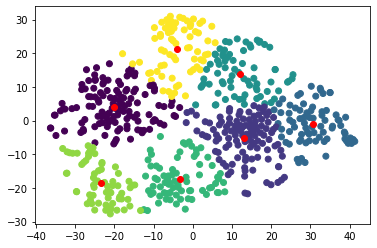

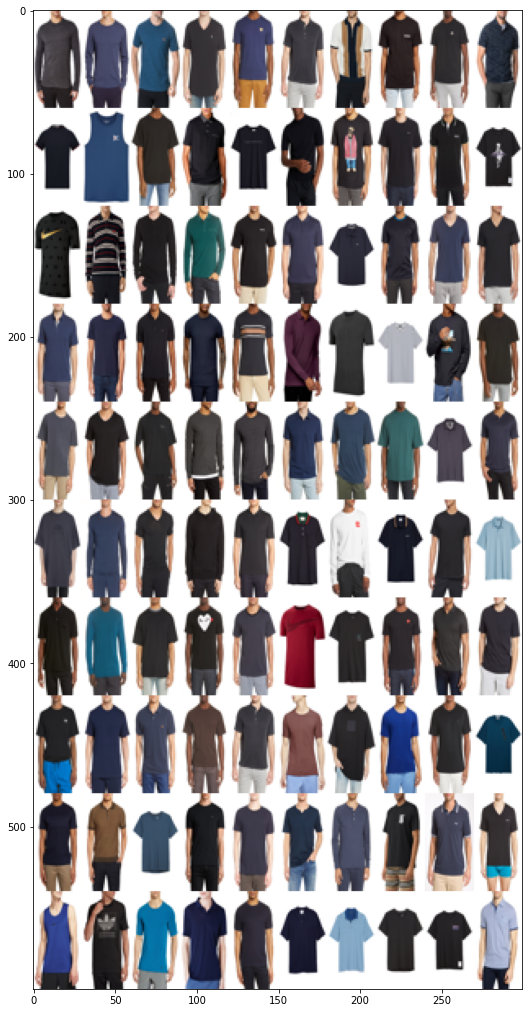

In [20]:
showTrend(start,end)